<a href="https://colab.research.google.com/github/BrendenInhelder/CECS456_FinalProject/blob/main/Carbon_Monoxide_Prediction_for_Air_Quality_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task: Regression
## Tasks: 
Predict CO concentration: One of the main pollutants measured in this dataset is Carbon Monoxide (CO). A regression model is to be trained to predict the CO concentration based on the other measured variables such as temperature, humidity, and other pollutants.
## Data Set Information:
The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. <br> <br>
Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.<br> <br>
Evidences of cross-sensitivities as well as both concept and sensor drifts are present eventually affecting sensors concentration estimation capabilities. <br><br>
Missing values are tagged with -200 value. 
## Instructions/Directions:
The Air Quality dataset contains hourly measurements of air quality from an Italian city.\
&nbsp;&nbsp;&nbsp;&nbsp;1. Perform exploratory data analysis and feature selection 	\
&nbsp;&nbsp;&nbsp;&nbsp;2. Visualization\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1. Plot the variable distribution using box plot, histogram, and provide a summary of your understanding               
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2. Provide an insight on the outcome of the correlation matrix.\
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3. Plot the relevant graphs    \
&nbsp;&nbsp;&nbsp;&nbsp;3. Perform feature extraction using Principal Component Analysis (PCA). \
&nbsp;&nbsp;&nbsp;&nbsp;4. For Model selection, perform K-Fold Cross Validation on the regression models used. \
&nbsp;&nbsp;&nbsp;&nbsp;5. Design a regression model (use at  least 5 regression models) and perform hyperparameter tuning and document the results.\
Dataset:  https://archive.ics.uci.edu/ml/datasets/Air+Quality



CO_GT (hourly averaged concentration CO in mg/m^3)
PT08.S1_CO (Tin oxide (SnO2) hourly averaged sensor response (nominally CO targeted))
NMHC_GT (hourly averaged overall Non-Methane Hydrocarbons concentration in microg/m^3)
PT08.S2_NMHC (Titania (TiO2) hourly averaged sensor response (nominally NMHC targeted))
NOx_GT ( hourly averaged NOx concentration in ppb)
PT08.S3_NOx (Tungsten oxide (WO3) hourly averaged sensor response (nominally NOx targeted))
NO2_GT (hourly averaged NO2 concentration in microg/m^3)
PT08.S4_NO2 (Tungsten oxide (WO3) hourly averaged sensor response (nominally NO2 targeted))
PT08.S5_O3 (Indium oxide (In2O3) hourly averaged sensor response (nominally O3 targeted))

T = Temperature
RH = Relative Humidity
AH = Absolute Humidity

Library imports

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from datetime import datetime
sns.set(color_codes=True)

# 1. Perform exploratory data analysis and feature selection

###Uploading Dataset

In [ ]:
#read csv as variable
dataset = pd.read_csv('AirQualityUCI.csv', delimiter=';', na_values=-200, usecols=range(15), decimal=',')

In [ ]:
dataset

Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0       18     2.6       1360.0      11.9         1046.0    166.0   
1       19     2.0       1292.0       9.4          955.0    103.0   
2       20     2.2       1402.0       9.0          939.0    131.0   
3       21     2.2       1376.0       9.2          948.0    172.0   
4       22     1.6       1272.0       6.5          836.0    131.0   
...    ...     ...          ...       ...            ...      ...   
9352    10     3.1       1314.0      13.5         1101.0    472.0   
9353    11     2.4       1163.0      11.4         1027.0    353.0   
9354    12     2.4       1142.0      12.4         1063.0    293.0   
9355    13     2.1       1003.0       9.5          961.0    235.0   
9356    14     2.2       1071.0      11.9         1047.0    265.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0           1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1           1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  
2           1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3           1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4           1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888  
...            ...      ...           ...          ...   ...   ...     ...  
9352         539.0    190.0        1374.0       1729.0  21.9  29.3  0.7568  
9353         604.0    179.0        1264.0       1269.0  24.3  23.7  0.7119  
9354         603.0    175.0        1241.0       1092.0  26.9  18.3  0.6406  
9355         702.0    156.0        1041.0        770.0  28.3  13.5  0.5139  
9356         654.0    168.0        1129.0        816.0  28.5  13.1  0.5028  

[9357 rows x 13 columns]

# New Section

In [ ]:
# display the dependent asked for in the task, CO(GT)
co_gt = dataset[["CO(GT)"]]
y = dataset.drop(['CO(GT)'], axis=1)
print(co_gt)

      CO(GT)
0        2.6
1        2.0
2        2.2
3        2.2
4        1.6
...      ...
9466     NaN
9467     NaN
9468     NaN
9469     NaN
9470     NaN

[9471 rows x 1 columns]


###Data Preprocessing

Fixing missing data

In [ ]:
#remove empty rows
dataset = dataset.dropna(how='all')

Looking for Initially Bad Features

In [ ]:
#quick look at our dataset for any obvious bad features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [ ]:
co_gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CO(GT)  7674 non-null   float64
dtypes: float64(1)
memory usage: 74.1 KB


In [ ]:
#NMHC has only 914 non-null values, so how much is it missing?
NMHC_missing = dataset['NMHC(GT)'].isna().sum()/len(dataset['NMHC(GT)'])
print('NMHC is missing around '+ str((NMHC_missing*100)//1) + "% of its data, so it may not be a good feature (maybe a bad sensor)")
#removing NMHC(GT) from the set
dataset.drop('NMHC(GT)', axis = 1, inplace=True)
dataset.info()

NMHC is missing around 90.0% of its data, so it may not be a good feature (maybe a bad sensor)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.1+ MB


<ipython-input-8-bd413e1a519d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop('NMHC(GT)', axis = 1, inplace=True)


Remove Outliers before interpolation for more accurate and representative data

In [ ]:
#Using Inter Quartile Range, reference: https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb#scrollTo=cFG9hck7aHUx
#Q1 = dataset.quantile(0.25)
#Q3 = dataset.quantile(0.75)
#IQR = Q3 - Q1
#print("Our IQR results, outliers in each column: ")
#print(IQR)
#print("Before removal: " + str(dataset.shape))
#dataset.info()
#dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
#print("After removal: " + str(dataset.shape))
#dataset.info()
#now we have removed many possible harmful outliers

In [ ]:
#Q1 = dataset.quantile(0.25) #first 25% of the data
#Q3 = dataset.quantile(0.75) #first 75% of the data
#IQR = Q3 - Q1 #IQR = InterQuartile Range

#scale = 2 #For Normal Distributions, scale = 1.5
#lower_lim = Q1 - scale*IQR
#upper_lim = Q3 + scale*IQR

#lower_outliers = (dataset[dataset.columns[2:13]] < lower_lim)
#upper_outliers = (dataset[dataset.columns[2:13]] > upper_lim)
#dataset[dataset.columns[2:13]][(lower_outliers | upper_outliers)].info()

In [ ]:
#num_cols = list(dataset.columns[2:13])
#dataset = dataset[~((dataset[num_cols] < (Q1 - 2 * IQR)) |(dataset[num_cols] > (Q3 + 2 * IQR))).any(axis=1)]
#dataset.info()

Interpolation

In [ ]:
#interpolating empty values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = "mean")
cols = dataset.columns[2:] #exclude the datetime columns
imputer.fit(dataset[cols])
clean_ds = pd.DataFrame(imputer.transform(dataset[cols]), columns = cols)
#ABOVE IS THE CODE FROM A CODELAB + I'm still trying to figure out how to make it work here

In [ ]:
clean_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   C6H6(GT)       9357 non-null   float64
 3   PT08.S2(NMHC)  9357 non-null   float64
 4   NOx(GT)        9357 non-null   float64
 5   PT08.S3(NOx)   9357 non-null   float64
 6   NO2(GT)        9357 non-null   float64
 7   PT08.S4(NO2)   9357 non-null   float64
 8   PT08.S5(O3)    9357 non-null   float64
 9   T              9357 non-null   float64
 10  RH             9357 non-null   float64
 11  AH             9357 non-null   float64
dtypes: float64(12)
memory usage: 877.3 KB


Bringing back time

In [ ]:
#NOT SURE IF THIS IS NECESSARY, BUT IT MIGHT BE EASIER TO WORK WITH LATER

#format date and time
#clean_ds["Datetime"] = dataset["Date"] + dataset["Time"]
#clean_ds['Datetime'] = clean_ds['Datetime'].apply(pd.to_datetime, format='%d/%m/%Y%H.%M.%S')
#clean_ds['Time'] = dataset['Time']
clean_ds['Time'] = pd.to_datetime(dataset['Time'], format='%H.%M.%S').dt.hour

#reorder columns
columns = clean_ds.columns.tolist()
columns = columns[-1:] + columns[:-1]

dataset = clean_ds[columns] #overwrite dataset with the preprocessed dataset

###Looking at Dataset

Correlation Table (for things like independent vs dependent and strong/weak correlations)

Time    CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
Time           1.000000  0.323944     0.321097  0.336890       0.380964   
CO(GT)         0.323944  1.000000     0.773394  0.812361       0.795578   
PT08.S1(CO)    0.321097  0.773394     1.000000  0.883795       0.892964   
C6H6(GT)       0.336890  0.812361     0.883795  1.000000       0.981950   
PT08.S2(NMHC)  0.380964  0.795578     0.892964  0.981950       1.000000   
NOx(GT)        0.200493  0.762273     0.615941  0.616801       0.601773   
PT08.S3(NOx)  -0.316828 -0.613877    -0.771938 -0.735744      -0.796703   
NO2(GT)        0.327673  0.646349     0.562843  0.535919       0.561180   
PT08.S4(NO2)   0.216572  0.558232     0.682881  0.765731       0.777254   
PT08.S5(O3)    0.239880  0.759027     0.899324  0.865689       0.880578   
T              0.202272  0.020257     0.048627  0.198956       0.241373   
RH            -0.289543  0.043198     0.114606 -0.061681      -0.090380   
AH            -0.018233  0.043274     0.135324  0.167972       0.186933   

                NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
Time           0.200493     -0.316828  0.327673      0.216572     0.239880   
CO(GT)         0.762273     -0.613877  0.646349      0.558232     0.759027   
PT08.S1(CO)    0.615941     -0.771938  0.562843      0.682881     0.899324   
C6H6(GT)       0.616801     -0.735744  0.535919      0.765731     0.865689   
PT08.S2(NMHC)  0.601773     -0.796703  0.561180      0.777254     0.880578   
NOx(GT)        1.000000     -0.563270  0.763074      0.205485     0.688205   
PT08.S3(NOx)  -0.563270      1.000000 -0.569479     -0.538468    -0.796569   
NO2(GT)        0.763074     -0.569479  1.000000      0.140655     0.629443   
PT08.S4(NO2)   0.205485     -0.538468  0.140655      1.000000     0.591144   
PT08.S5(O3)    0.688205     -0.796569  0.629443      0.591144     1.000000   
T             -0.235636     -0.145112 -0.165466      0.561270    -0.027172   
RH             0.192587     -0.056740 -0.080569     -0.032188     0.124956   
AH            -0.126868     -0.232017 -0.291392      0.629641     0.070751   

                      T        RH        AH  
Time           0.202272 -0.289543 -0.018233  
CO(GT)         0.020257  0.043198  0.043274  
PT08.S1(CO)    0.048627  0.114606  0.135324  
C6H6(GT)       0.198956 -0.061681  0.167972  
PT08.S2(NMHC)  0.241373 -0.090380  0.186933  
NOx(GT)       -0.235636  0.192587 -0.126868  
PT08.S3(NOx)  -0.145112 -0.056740 -0.232017  
NO2(GT)       -0.165466 -0.080569 -0.291392  
PT08.S4(NO2)   0.561270 -0.032188  0.629641  
PT08.S5(O3)   -0.027172  0.124956  0.070751  
T              1.000000 -0.578621  0.656397  
RH            -0.578621  1.000000  0.167971  
AH             0.656397  0.167971  1.000000

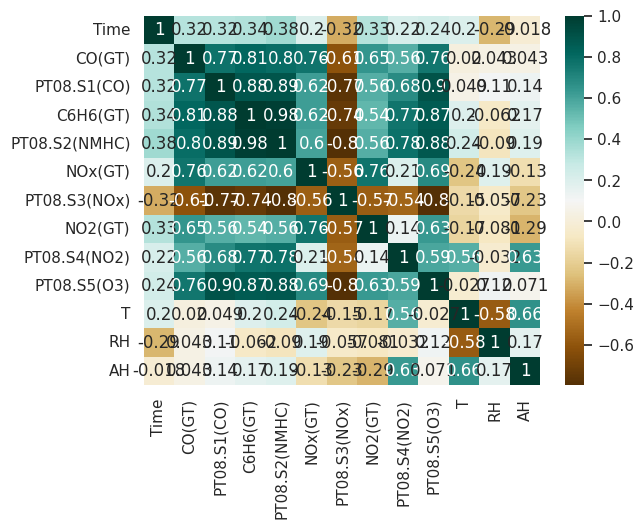

In [ ]:
# creating a correlation table, reference: https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb#scrollTo=GGyDovL2QDLa
dataset.describe()
correlation_table= dataset.corr()
sns.heatmap(correlation_table,cmap="BrBG",annot=True)
correlation_table
#using this heatmap, we can that T, RH, and AH are the independent variables, along with many other correlations that need to be examined

<Axes: >

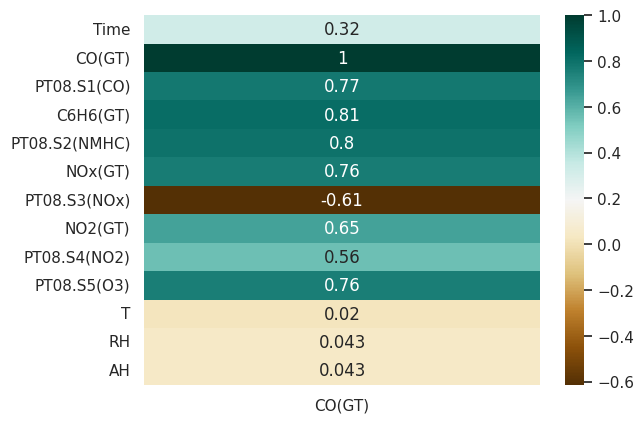

In [ ]:
correlation_table = dataset.corr()
co_gt_correlation = correlation_table["CO(GT)"]
sns.heatmap(co_gt_correlation.to_frame(), cmap = "BrBG", annot=True)

#Explanation
# Highest correlation to lowest correlation at the bottom

In [ ]:
dataset

Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0       18     2.6       1360.0      11.9         1046.0    166.0   
1       19     2.0       1292.0       9.4          955.0    103.0   
2       20     2.2       1402.0       9.0          939.0    131.0   
3       21     2.2       1376.0       9.2          948.0    172.0   
4       22     1.6       1272.0       6.5          836.0    131.0   
...    ...     ...          ...       ...            ...      ...   
9352    10     3.1       1314.0      13.5         1101.0    472.0   
9353    11     2.4       1163.0      11.4         1027.0    353.0   
9354    12     2.4       1142.0      12.4         1063.0    293.0   
9355    13     2.1       1003.0       9.5          961.0    235.0   
9356    14     2.2       1071.0      11.9         1047.0    265.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0           1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1           1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255  
2           1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3           1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4           1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888  
...            ...      ...           ...          ...   ...   ...     ...  
9352         539.0    190.0        1374.0       1729.0  21.9  29.3  0.7568  
9353         604.0    179.0        1264.0       1269.0  24.3  23.7  0.7119  
9354         603.0    175.0        1241.0       1092.0  26.9  18.3  0.6406  
9355         702.0    156.0        1041.0        770.0  28.3  13.5  0.5139  
9356         654.0    168.0        1129.0        816.0  28.5  13.1  0.5028  

[9357 rows x 13 columns]

###Splitting into training and test data

In [ ]:
from sklearn.model_selection import train_test_split

#independents = ['T', 'RH', 'AH', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
independents = ['T', 'RH', 'AH', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', "C6H6(GT)", "NOx(GT)", "NO2(GT)", "PT08.S3(NOx)"]
dependents = ['CO(GT)']
X =  dataset[independents]
y = dataset[dependents]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 2.1. Plot the variable distribution using box plot, histogram, and provide a summary of your understanding

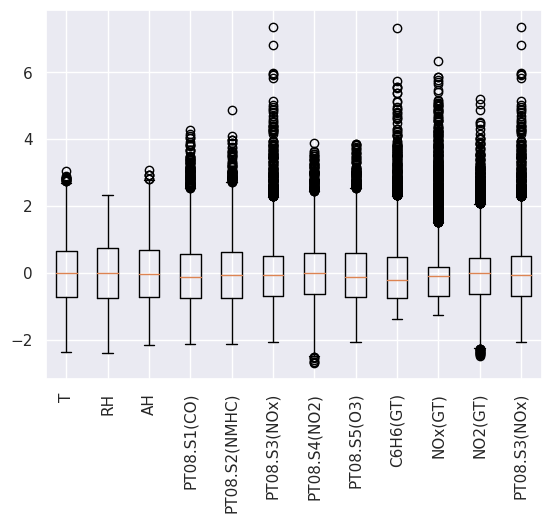

In [ ]:
import matplotlib.pyplot as plt
bp = plt.boxplot(X_train, labels=independents)
plt.xticks(rotation=90, ha='center')
plt.show()

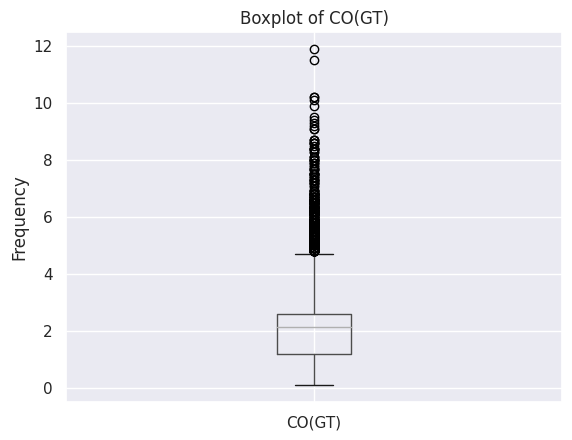

In [ ]:
#BOXPLOT FOR JUST CO(GT)
dataset.boxplot(column='CO(GT)')
plt.title('Boxplot of CO(GT)')

plt.ylabel('Frequency')

plt.show()

#Explanation
# the line right below 2 is the median
# box is the interquartile range which represents 50% of the data
# the whiskers or the horizontal lines outisde the box are the minimum and maximum value that aren't outliers
# the outliers are represented by points

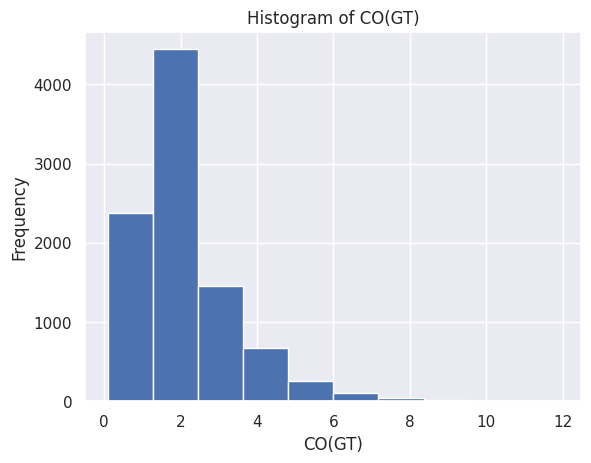

In [ ]:
import matplotlib.pyplot as plt
dataset.hist(column='CO(GT)')
plt.title('Histogram of CO(GT)')

plt.xlabel('CO(GT)')
plt.ylabel('Frequency')

plt.show()

# 2.2. Provide an insight on the outcome of the correlation matrix.

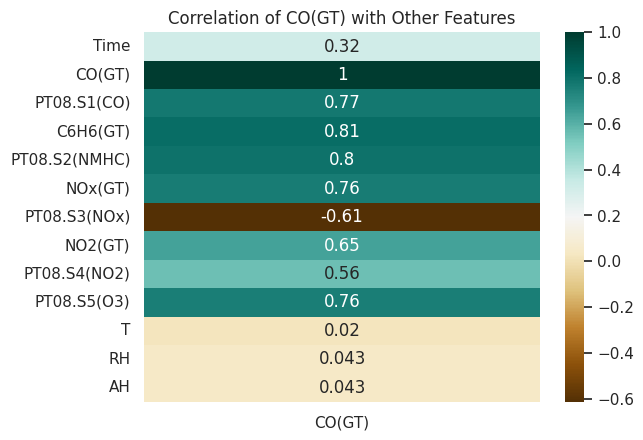

In [ ]:
# reference: https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf
# WN- I used this website a lot to refresh my memory on correlations + on what would be considered
# a strong correlation

dataset.corr()

# reference: https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb#scrollTo=GGyDovL2QDLa
correlation_table = dataset.corr()
co_gt_correlation = correlation_table["CO(GT)"]
hmPLT = sns.heatmap(co_gt_correlation.to_frame(), cmap = "BrBG", annot=True)
hmPLT.set_title("Correlation of CO(GT) with Other Features")

plt.show()

#Explanation
# Highest correlation to lowest correlation at the bottom
# WN - shows correlations between different variables, 
# reminds me of a multiplication table; using a row you can find the correlation 
# between that variable and the column variable
# 0.3 - 0.7 moderate correlation, >0.7 is strong correlation, <0.3 is weak
# closer to 0 is weaker, closer to 1 or -1 stronger, negative means one goes up as one goes down and vice versa


# variables that are highly correlated
# correlations seem fairly random without going into each and every pairing
  # strong correlations
  # C6H6, PT08.S2


#variables that don't correlate as much
  #T, RH. AH has a lot of weak correlations
  #T inversely correlates with RH

# patterns or trends we observe
# nothing other than pairing with itself has perfect correlation
# ^ thats to be expected, near impossible to have perfect correlation

# 2.3. Plot the relevant graphs

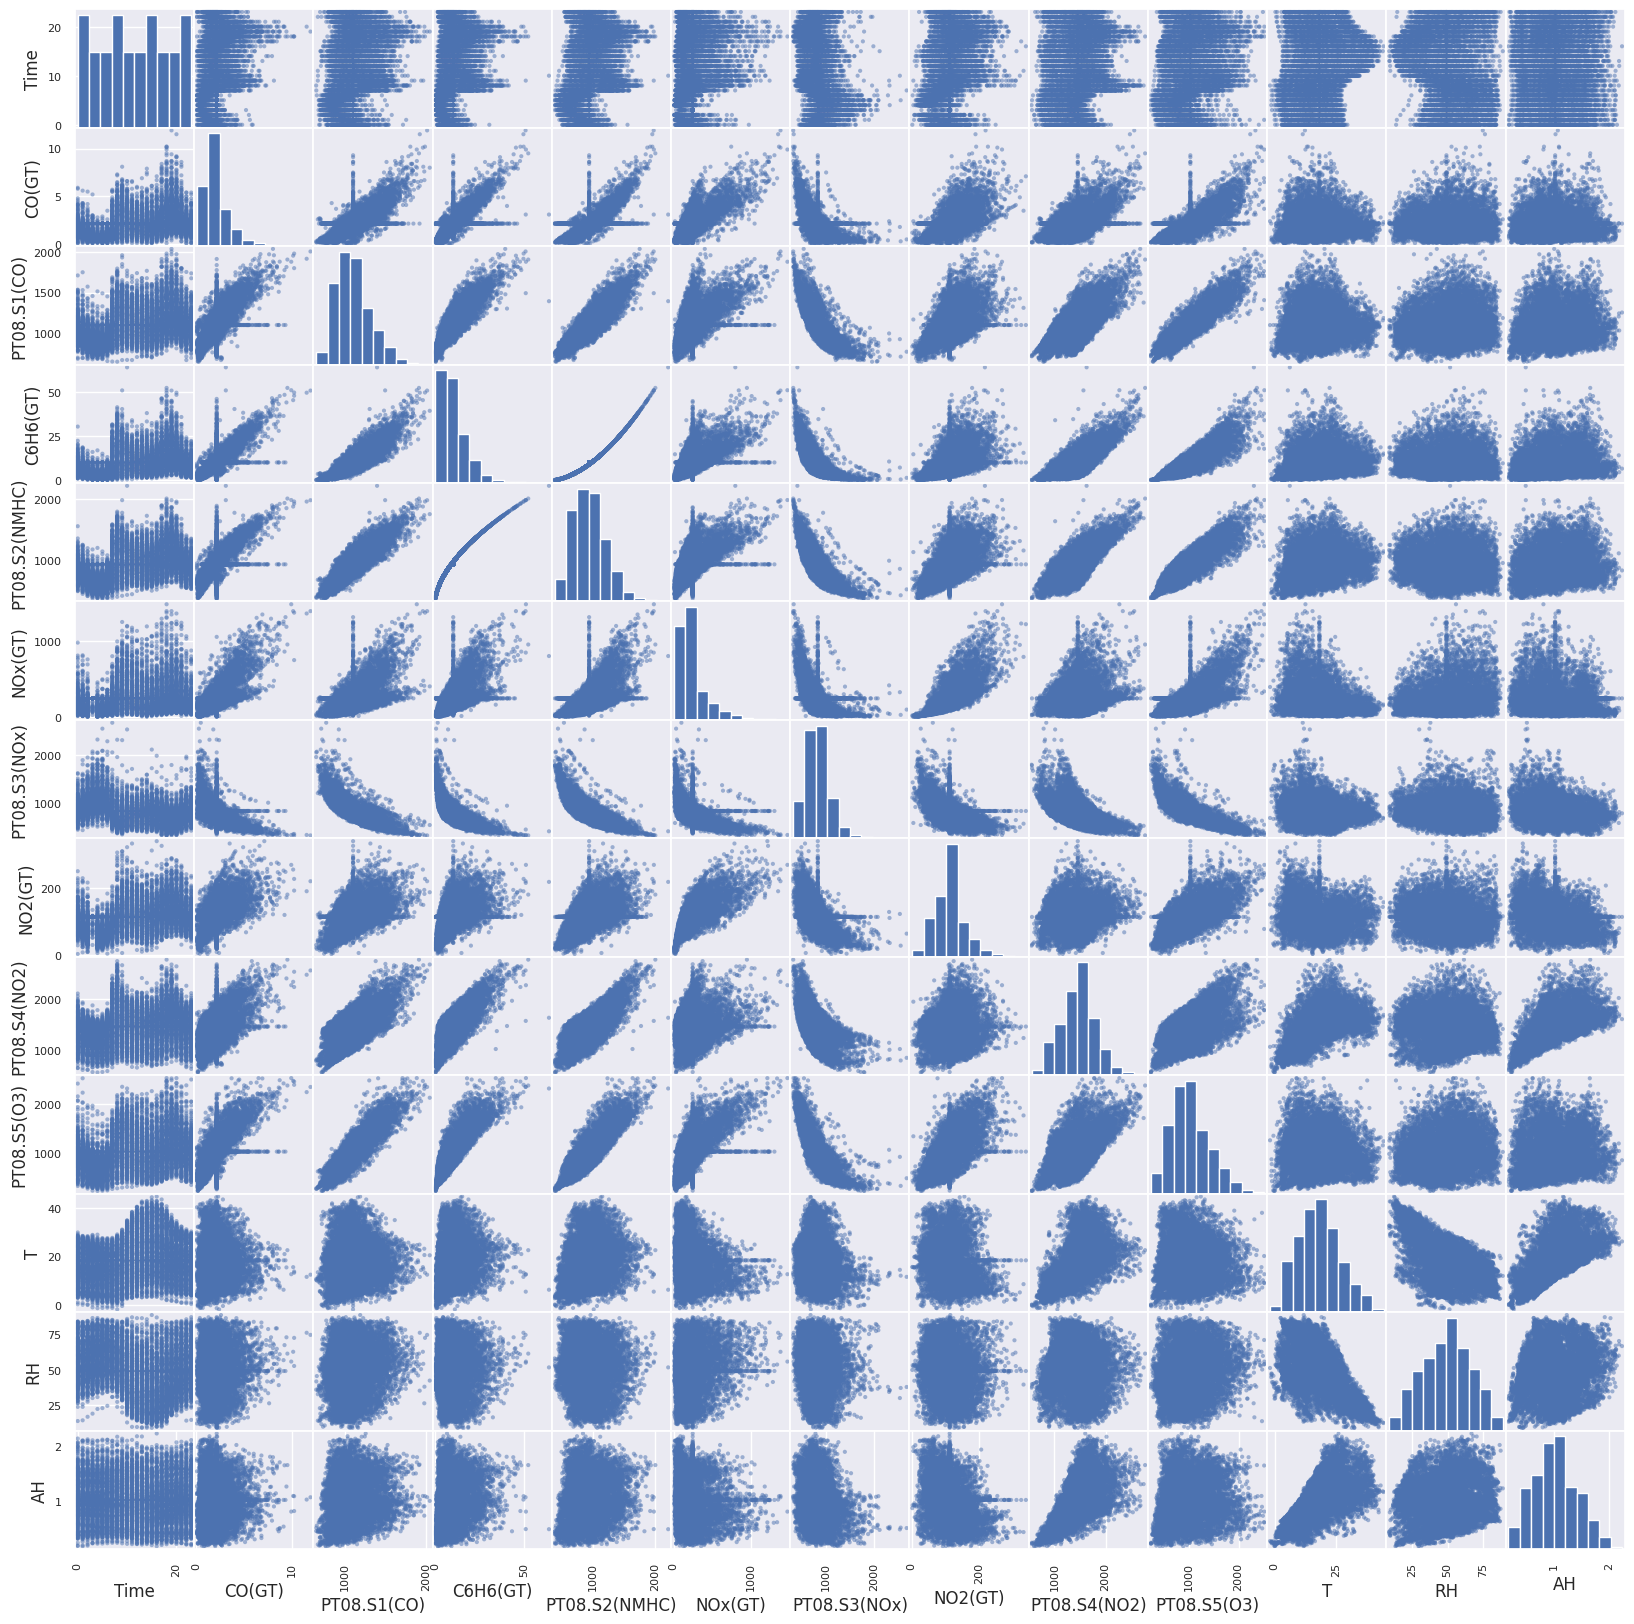

In [ ]:
# reference: https://colab.research.google.com/github/AllenDowney/ElementsOfDataScience/blob/master/examples/correlation.ipynb
# I looked at this website for looking at correlations and saw the scatterplot, thought
# it was a good idea to plot the correlation in a way that is visually easier to understand

# WN - I imported a scatter matrix to visualize the relationship between variables, similar to 
# correlation, but in an easier visual to look at
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20,20))
plt.show()

# WN - from this we can see that C6H6(GT) has a strong positive correlation with PT08.S2
# and T, R and AH have a lot of weak correlations
# we can see this by which way the points are place (up and right is positive correlation)
# (down and right is a negative correlation)
# and also by how cluttered the points are, we can determine if its a weak or strong correlation


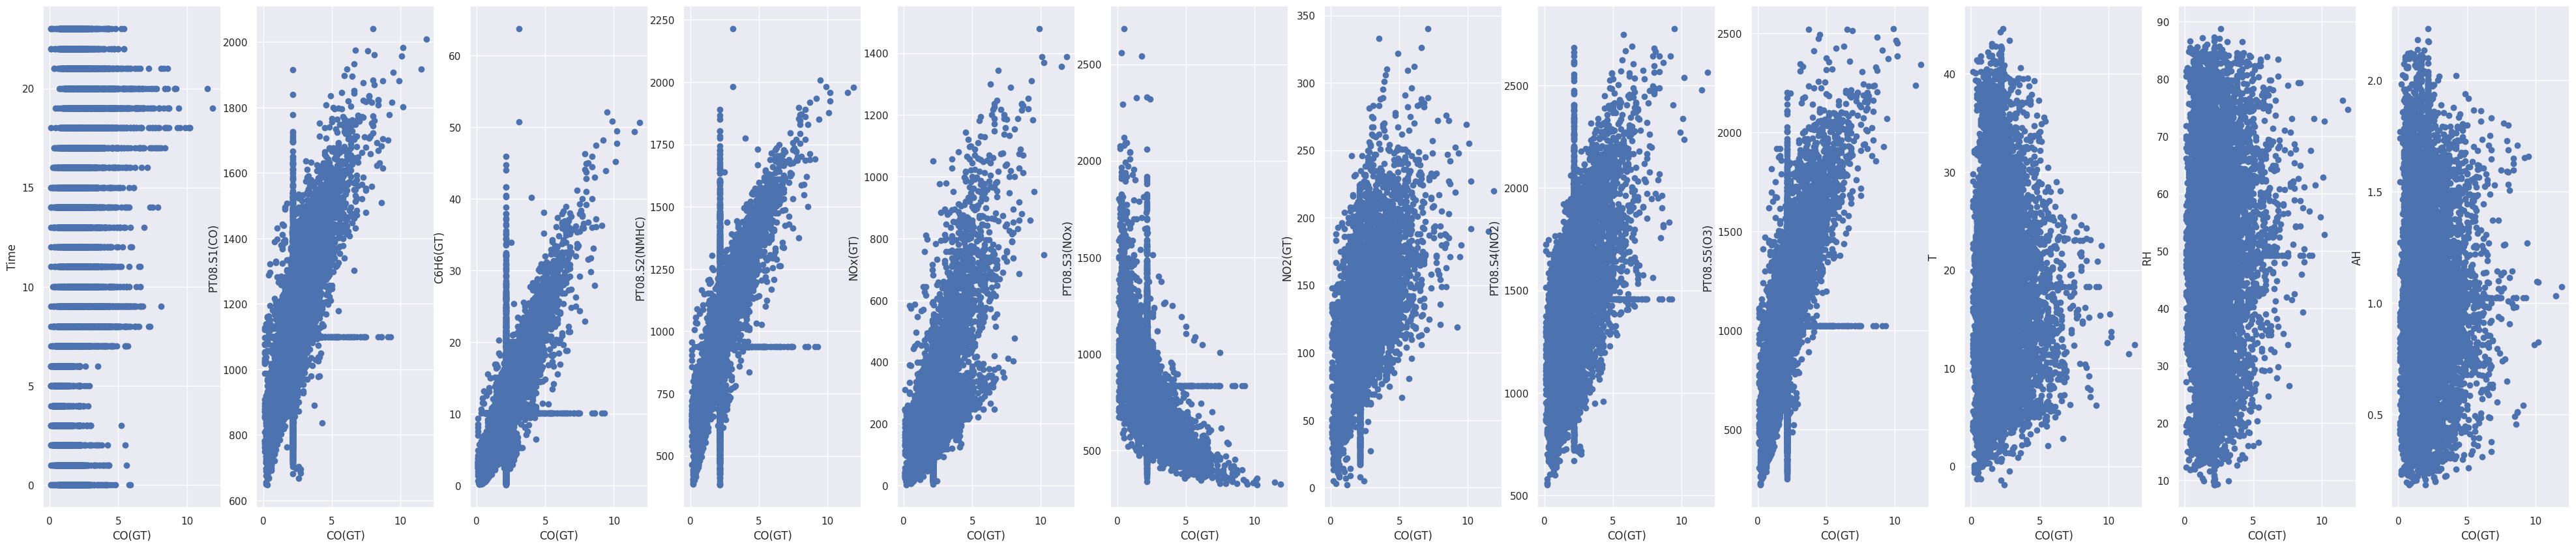

In [ ]:
data_y = dataset.drop(['CO(GT)'], axis=1)
data_x = dataset['CO(GT)']

# scatter plot with CO(GT) as the x, other variables as the Y
fig, ax = plt.subplots(nrows=1, ncols=len(data_y.columns), figsize=(50, 10))
for i, column in enumerate(data_y.columns):
    ax[i].scatter(data_x, data_y[column], alpha=1)
    ax[i].set_xlabel('CO(GT)')
    ax[i].set_ylabel(column)
plt.show()
# WN - showing CO(GT) and which variables it has the most correlation with

# 3. Perform feature extraction using Principal Component Analysis (PCA)

In [ ]:
#


[[0.93913327]
 [1.08358325]
 [1.22803323]
 ...
 [0.0724334 ]
 [0.21688338]
 [0.36133336]]


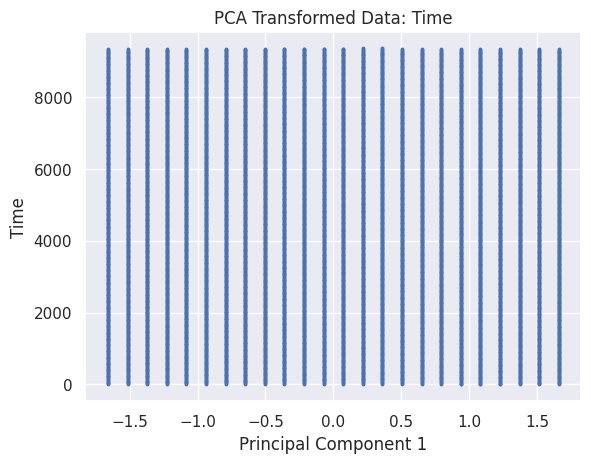

[[ 0.33985649]
 [-0.11607126]
 [ 0.03590466]
 ...
 [ 0.18788057]
 [-0.0400833 ]
 [ 0.03590466]]


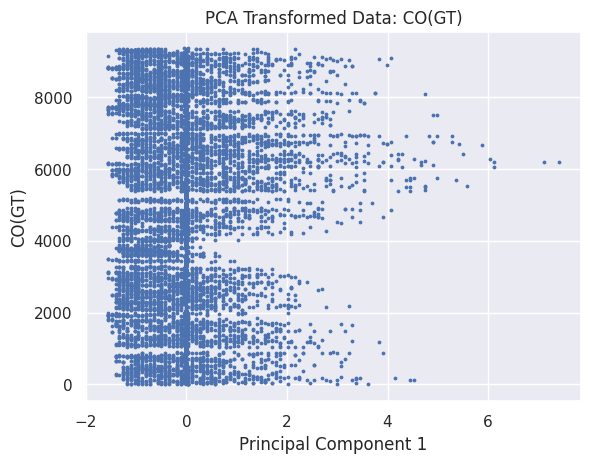

[[ 1.22270169]
 [ 0.90312323]
 [ 1.42008838]
 ...
 [ 0.19817076]
 [-0.4550852 ]
 [-0.13550675]]


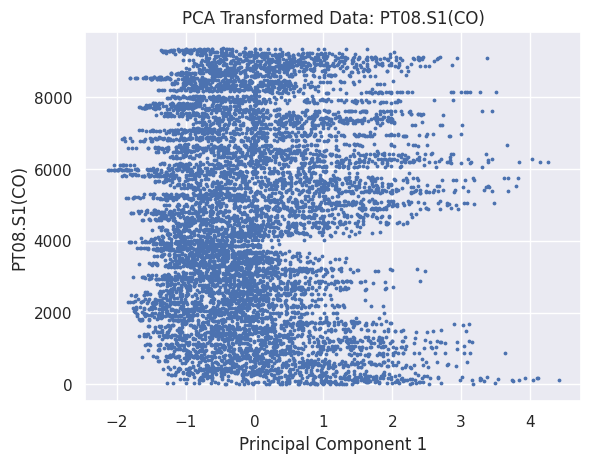

[[ 0.24881265]
 [-0.09354711]
 [-0.14832467]
 ...
 [ 0.3172846 ]
 [-0.07985272]
 [ 0.24881265]]


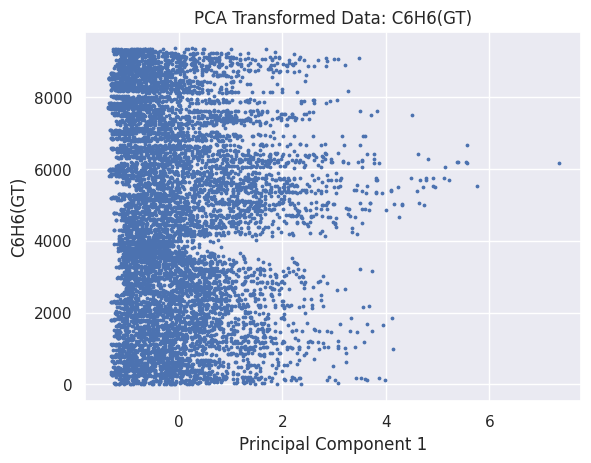

[[ 0.40851903]
 [ 0.06058823]
 [-0.00058642]
 ...
 [ 0.47351709]
 [ 0.08352872]
 [ 0.41234245]]


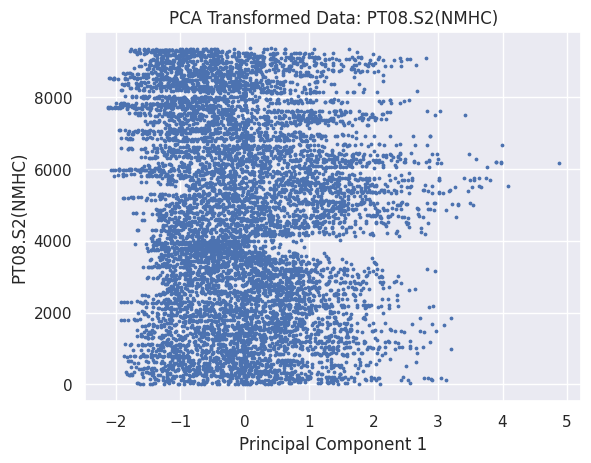

[[-0.41825191]
 [-0.7439742 ]
 [-0.59920874]
 ...
 [ 0.23836288]
 [-0.06150844]
 [ 0.09359741]]


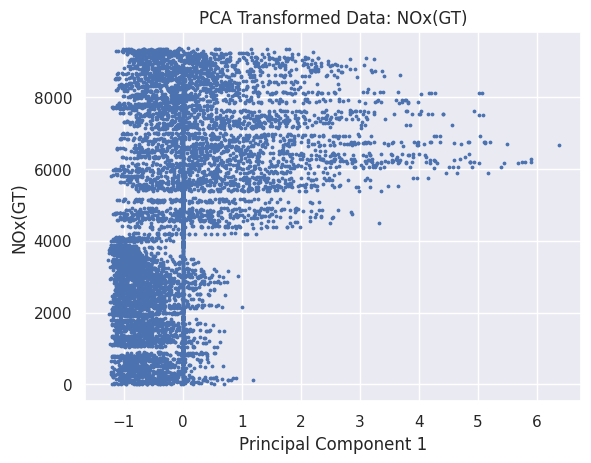

[[ 0.87596217]
 [ 1.34471744]
 [ 1.20965236]
 ...
 [-0.92358138]
 [-0.53030365]
 [-0.72098377]]


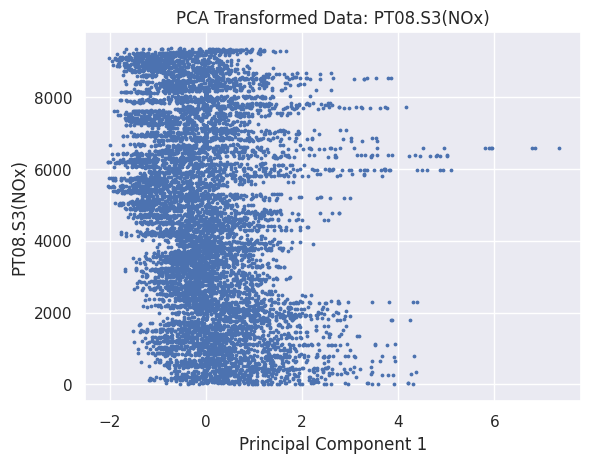

[[-0.00207773]
 [-0.48023497]
 [ 0.02069167]
 ...
 [ 1.40962461]
 [ 0.97700615]
 [ 1.25023886]]


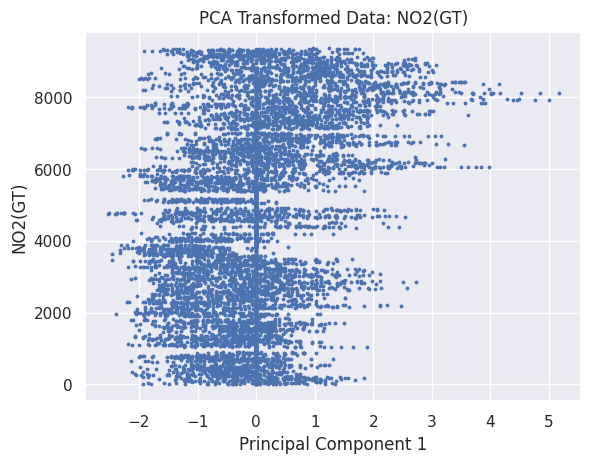

[[ 0.69466864]
 [ 0.30274223]
 [ 0.29095497]
 ...
 [-0.63434496]
 [-1.22370798]
 [-0.96438825]]


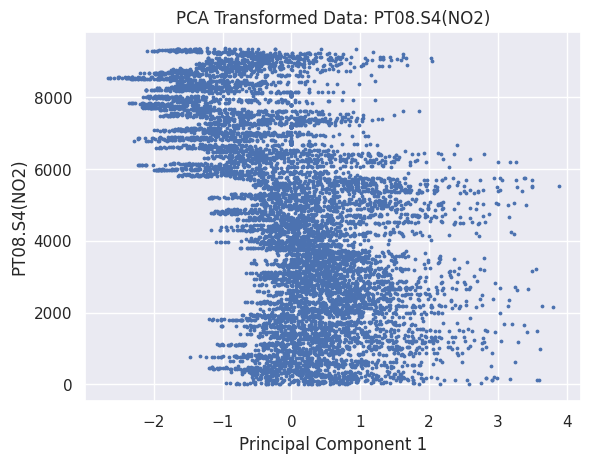

[[ 0.6274942 ]
 [-0.13033088]
 [ 0.13081155]
 ...
 [ 0.1768955 ]
 [-0.6474953 ]
 [-0.52972518]]


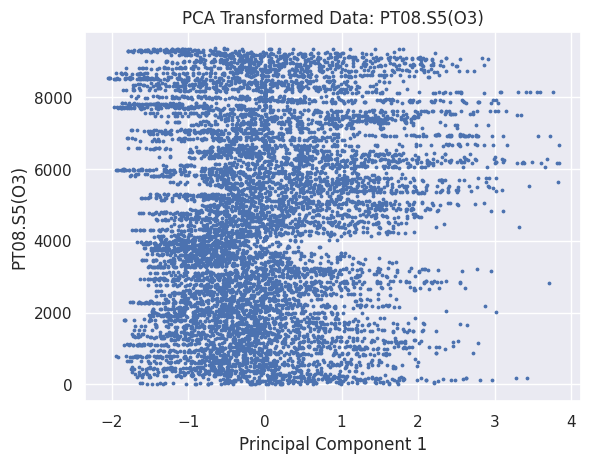

[[-0.54496161]
 [-0.57961494]
 [-0.74133048]
 ...
 [ 0.99133602]
 [ 1.15305155]
 [ 1.17615377]]


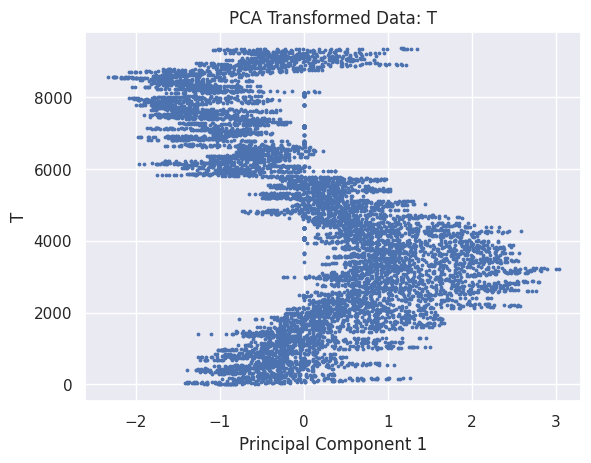

[[-0.01968911]
 [-0.09038591]
 [ 0.28077229]
 ...
 [-1.8224575 ]
 [-2.1052447 ]
 [-2.1288103 ]]


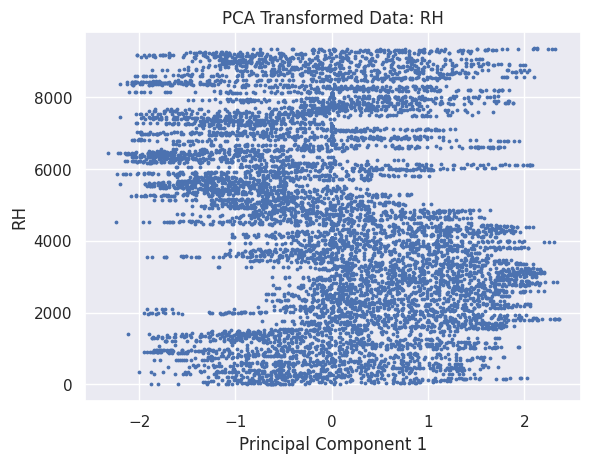

[[-0.67640386]
 [-0.7580078 ]
 [-0.69560479]
 ...
 [-0.97250236]
 [-1.29260202]
 [-1.32064548]]


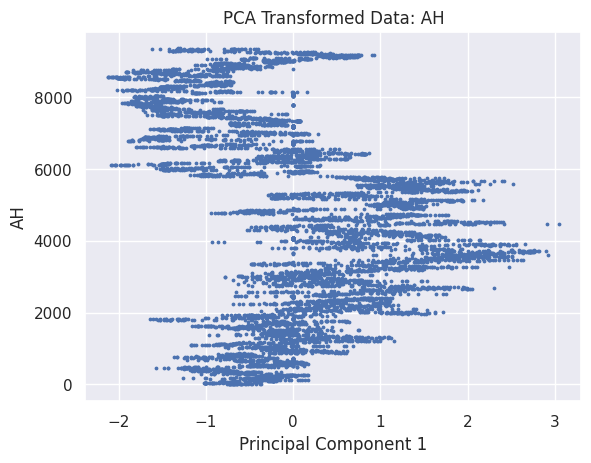

In [ ]:
# this might be useful: https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.09-Principal-Component-Analysis.ipynb
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
numerical_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_cols:
    # Mean normalize the data
    col_mean = dataset[col].mean()
    col_std = dataset[col].std()
    dataset_norm = (dataset[col] - col_mean) / col_std

    # Scale the data
    scaler = StandardScaler()
    dataset_scaled = scaler.fit_transform(dataset_norm.values.reshape(-1, 1))
    print(dataset_scaled)
    # Apply PCA to each column
    pca = PCA(n_components=1)
    pca.fit(dataset_scaled)
    dataset_pca = pca.transform(dataset_scaled)

    #plt.scatter(dataset_pca, range(len(dataset)))
    plt.scatter(dataset_pca, range(len(dataset)), s=3)

    plt.xlabel('Principal Component 1')
    plt.ylabel(col)
    plt.title(f'PCA Transformed Data: {col}')
    plt.show()


# Select numerical columns
numerical_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()

# Mean normalize and scale the data
dataset_norm = (dataset[numerical_cols] - dataset[numerical_cols].mean()) / dataset[numerical_cols].std()
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset_norm)

# Apply PCA to the scaled data
pca = PCA(n_components=1)
pca.fit(dataset_scaled)
dataset_pca = pca.transform(dataset_scaled)

# Plot scatter matrix
scatter_matrix(pd.DataFrame(dataset_pca, columns=['PCA']), figsize=(10, 10))
plt.show()

# 4. For Model selection, perform K-Fold Cross Validation on the regression models used.

In [ ]:
# Import the models
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

# Define number of splits for KFold
num_splits = 10

# Create a list of models
models = [
    LinearRegression(),
    Lasso(),
    BayesianRidge(),
    make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
    RandomForestRegressor(n_estimators=100, random_state=42)
]

# Create KFold object
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

# Train and evaluate each model
for model in models:
    # Create an empty list to store the cross-validation results
    accuracies = []

    # Train and evaluate the model with KFold cross-validation
    for train_index, test_index in kf.split(X):
        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index].values.ravel(), y.iloc[test_index].values.ravel()

        # Train the model
        model.fit(X_train, y_train)

        # Make the prediction
        y_pred = model.predict(X_test)

        # Evaluate the model and store the result in accuracies list
        r2 = r2_score(y_test, y_pred)
        accuracies.append(r2)

    # Calculate the mean and standard deviation of the accuracies
    mean_accuracy = sum(accuracies) / len(accuracies)
    std_dev = np.std(accuracies)

    # Print the results
    print(f"{type(model).__name__} R2 score: {mean_accuracy:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")


#the outputs for R2 or coefficient of determination are a statistical measure for representing the variance in the dependent variable that is predictable from the independent variable. 
# the reason why there are two pipelines is because we have to apply two steps: transforming the input features up to a specific degree, the first one being degree 2 and the 2nd one being degree 3
#and then fitting a linear regression to the transformed features
# polynomial regression is a regression analysis between independent and dependent variables up specific degree.

LinearRegression R2 score: 0.79
Standard Deviation: 0.02
Lasso R2 score: 0.78
Standard Deviation: 0.02
BayesianRidge R2 score: 0.79
Standard Deviation: 0.02
Pipeline R2 score: 0.82
Standard Deviation: 0.02
Pipeline R2 score: 0.84
Standard Deviation: 0.02
RandomForestRegressor R2 score: 0.86
Standard Deviation: 0.02


# 5. Design a regression model (use at least 5 regression models) and perform hyperparameter tuning and document the results.

Linear Regression

In [ ]:
#REFERENCE: https://colab.research.google.com/github/TheBrainCodeGames/2021_seminars/blob/main/AI/Notebooks/Linear_Regression_Practice.ipynb#scrollTo=rXZufMftTkzE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from pprint import pprint

In [ ]:
l_column = list(dataset.columns) # Making a list out of column names
#print(l_column)
#l_column.remove("C6H6(GT)")
#l_column.remove("NOx(GT)")
#l_column.remove("NO2(GT)")
#l_column.remove("PT08.S4(NO2)")
#l_column.remove("PT08.S2(NMHC)")
l_column.remove("T")
l_column.remove("RH")
l_column.remove("AH")
#print(l_column)
len_feature = len(l_column) # Length of column vector list
#print(l_column)
X = dataset[l_column[2:len_feature]]
y = dataset[l_column[1]]
#X.drop('T')
print("X")
print(X)
print("y")
print(y)

X
      PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  \
0          1360.0      11.9         1046.0    166.0        1056.0    113.0   
1          1292.0       9.4          955.0    103.0        1174.0     92.0   
2          1402.0       9.0          939.0    131.0        1140.0    114.0   
3          1376.0       9.2          948.0    172.0        1092.0    122.0   
4          1272.0       6.5          836.0    131.0        1205.0    116.0   
...           ...       ...            ...      ...           ...      ...   
9352       1314.0      13.5         1101.0    472.0         539.0    190.0   
9353       1163.0      11.4         1027.0    353.0         604.0    179.0   
9354       1142.0      12.4         1063.0    293.0         603.0    175.0   
9355       1003.0       9.5          961.0    235.0         702.0    156.0   
9356       1071.0      11.9         1047.0    265.0         654.0    168.0   

      PT08.S4(NO2)  PT08.S5(O3)  
0           1692.0       12

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
print("Feature set size:",X.shape)
print("Variable set size:",y.shape)
print("Training feature set size:",X_train.shape)
print("Test feature set size:",X_test.shape)
print("Training variable set size:",y_train.shape)
print("Test variable set size:",y_test.shape)

Feature set size: (9357, 8)
Variable set size: (9357,)
Training feature set size: (7485, 8)
Test feature set size: (1872, 8)
Training variable set size: (7485,)
Test variable set size: (1872,)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
#dataset['predicted'] = lr.predict(X_test)
#dataset[['Total', 'predicted']].plot(alpha=0.5);
# Print accuracy metrics and feature coefficients
#print("{0:.1%} accuracy on test set.".format(accuracy_score(y_test, y_pred)))
#pprint(dict(zip(X.columns, abs(lr.coef_[0]).round(2))))

LinearRegression()

In [ ]:
print("The intercept term of the linear model:", lr.intercept_)
print("The coefficients of the linear model:", lr.coef_)
#print(len(X_train.columns))
#print(lr.coef_.shape)
cdf = pd.DataFrame(data=lr.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

The intercept term of the linear model: -2.0207497369257976
The coefficients of the linear model: [ 0.00111164  0.06575204 -0.00022058  0.00292967  0.00060622  0.00416322
  0.00074836 -0.00029551]


Coefficients
PT08.S1(CO)        0.001112
C6H6(GT)           0.065752
PT08.S2(NMHC)     -0.000221
NOx(GT)            0.002930
PT08.S3(NOx)       0.000606
NO2(GT)            0.004163
PT08.S4(NO2)       0.000748
PT08.S5(O3)       -0.000296

In [ ]:
n=X_train.shape[0]
k=X_train.shape[1]
#print(n, k)
dfN = n-k
train_pred=lr.predict(X_train)
print("train_pred")
print(train_pred)
train_error = np.square(train_pred - y_train)
print("train_error")
print(train_error)
sum_error=np.sum(train_error)
print("sum_error")
print(sum_error)
se=[0]*(len_feature-2)
print(se)
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

train_pred
[1.49317997 2.55832613 1.80255649 ... 1.4673763  1.78226541 1.33058627]
train_error
449     0.000047
5349    0.164492
8693    0.000007
6815    0.402703
2479    0.029416
          ...   
7382    0.671560
7763    0.002362
5218    0.469736
1346    0.100955
3582    0.004818
Name: CO(GT), Length: 7485, dtype: float64
sum_error
2693.289481710501
[0, 0, 0, 0, 0, 0, 0, 0]


Coefficients  Standard Error  t-statistic
PT08.S1(CO)        0.001112        0.000033    34.084924
C6H6(GT)           0.065752        0.000954    68.900194
PT08.S2(NMHC)     -0.000221        0.000027    -8.282624
NOx(GT)            0.002930        0.000036    80.931764
PT08.S3(NOx)       0.000606        0.000028    21.837020
NO2(GT)            0.004163        0.000158    26.311381
PT08.S4(NO2)       0.000748        0.000020    36.556610
PT08.S5(O3)       -0.000296        0.000018   -16.630139

In [ ]:
print("Therefore, features arranged in the order of importance for predicting the CO(GT)\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the CO(GT)
------------------------------------------------------------------------------------------
NOx(GT) > 
C6H6(GT) > 
PT08.S4(NO2) > 
PT08.S1(CO) > 
NO2(GT) > 
PT08.S3(NOx) > 
PT08.S2(NMHC) > 
PT08.S5(O3)


'\nax5 = plt.subplot(gs[5])\nax5.scatter(dataset[l[5]],dataset[\'CO(GT)\'])\nax5.set_title(l[5]+" vs. CO(GT)",fontdict={\'fontsize\':20})\n\nax6 = plt.subplot(gs[6])\nax6.scatter(dataset[l[6]],dataset[\'CO(GT)\'])\nax6.set_title(l[6]+" vs. CO(GT)",fontdict={\'fontsize\':20})\n\nax7 = plt.subplot(gs[7])\nax7.scatter(dataset[l[7]],dataset[\'CO(GT)\'])\nax7.set_title(l[7]+" vs. CO(GT)",fontdict={\'fontsize\':20})\n'

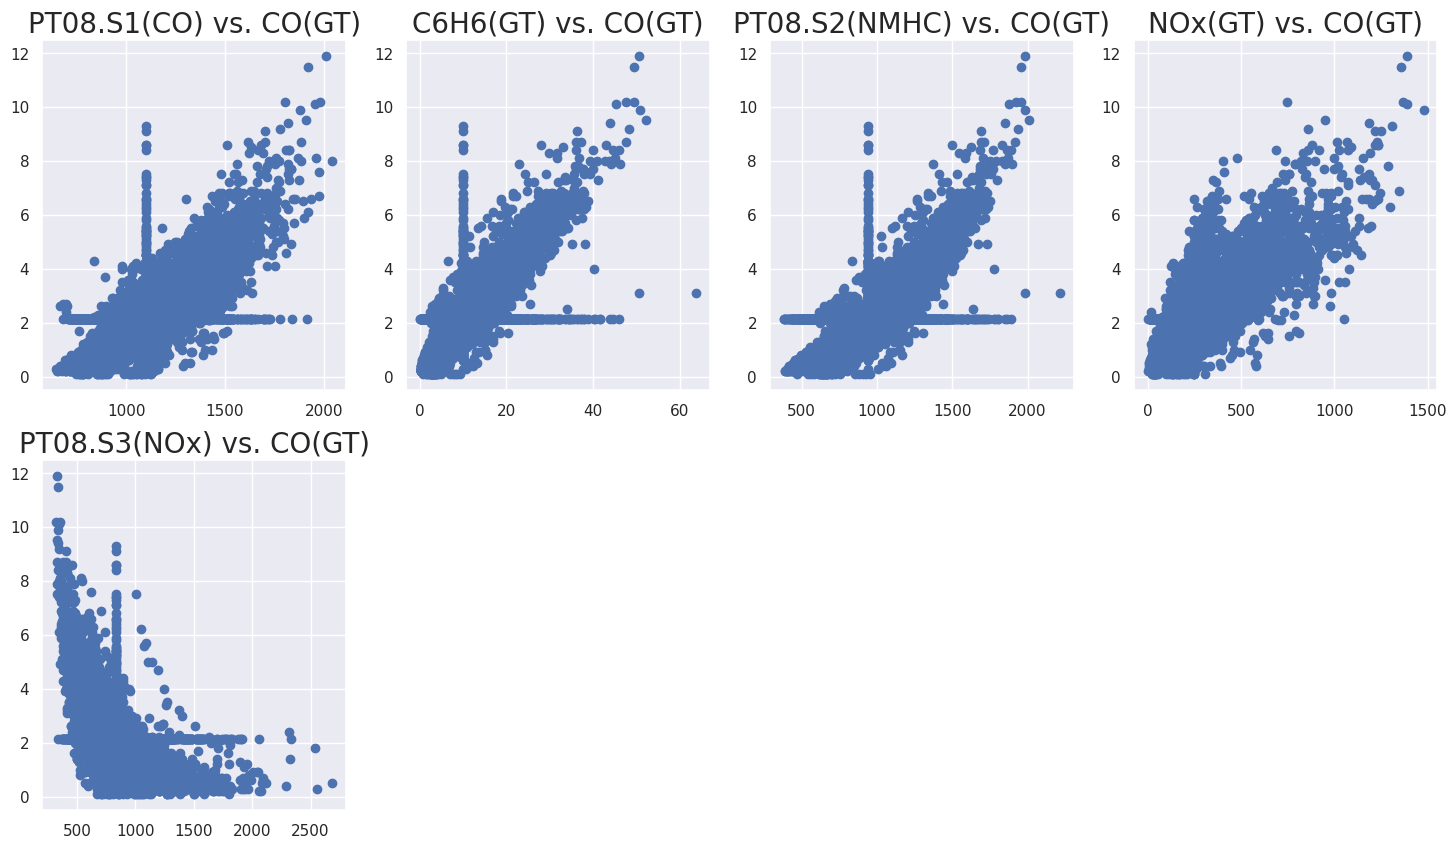

In [ ]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2, 4)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(dataset[l[0]],dataset['CO(GT)'])
ax0.set_title(l[0]+" vs. CO(GT)", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(dataset[l[1]],dataset['CO(GT)'])
ax1.set_title(l[1]+" vs. CO(GT)",fontdict={'fontsize':20})

ax2 = plt.subplot(gs[2])
ax2.scatter(dataset[l[2]],dataset['CO(GT)'])
ax2.set_title(l[2]+" vs. CO(GT)",fontdict={'fontsize':20})

ax3 = plt.subplot(gs[3])
ax3.scatter(dataset[l[3]],dataset['CO(GT)'])
ax3.set_title(l[3]+" vs. CO(GT)",fontdict={'fontsize':20})

ax4 = plt.subplot(gs[4])
ax4.scatter(dataset[l[4]],dataset['CO(GT)'])
ax4.set_title(l[4]+" vs. CO(GT)",fontdict={'fontsize':20})
"""
ax5 = plt.subplot(gs[5])
ax5.scatter(dataset[l[5]],dataset['CO(GT)'])
ax5.set_title(l[5]+" vs. CO(GT)",fontdict={'fontsize':20})

ax6 = plt.subplot(gs[6])
ax6.scatter(dataset[l[6]],dataset['CO(GT)'])
ax6.set_title(l[6]+" vs. CO(GT)",fontdict={'fontsize':20})

ax7 = plt.subplot(gs[7])
ax7.scatter(dataset[l[7]],dataset['CO(GT)'])
ax7.set_title(l[7]+" vs. CO(GT)",fontdict={'fontsize':20})
"""

In [ ]:
print("R-squared value of this fit:",round(metrics.r2_score(y_train,train_pred),3))

R-squared value of this fit: 0.788


In [ ]:
predictions = lr.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1872,)


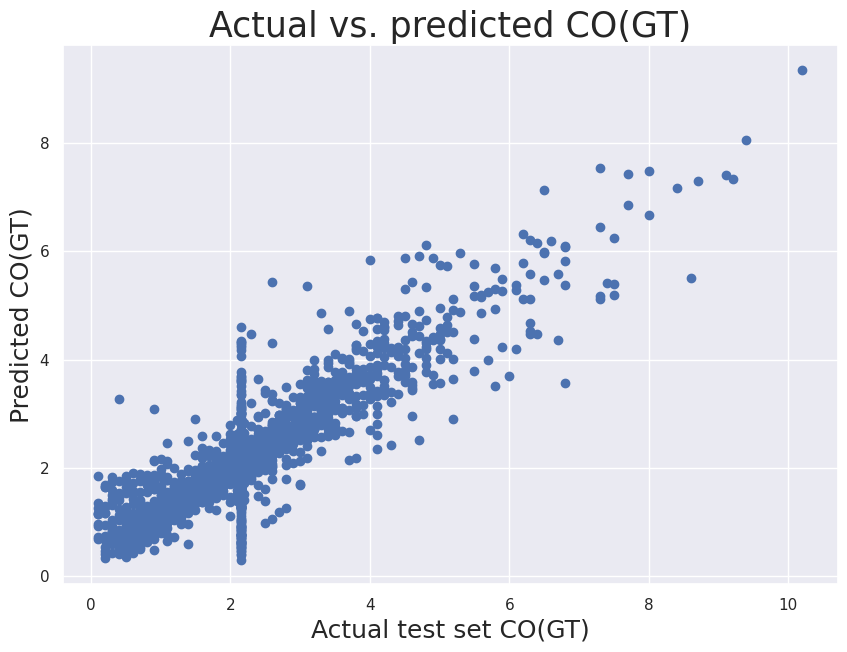

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted CO(GT)",fontsize=25)
plt.xlabel("Actual test set CO(GT)",fontsize=18)
plt.ylabel("Predicted CO(GT)", fontsize=18)
plt.scatter(x=y_test,y=predictions)

<ipython-input-41-d7a31be89a55>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_test-predictions])


<Axes: title={'center': 'Histogram of residuals to check for normality'}, xlabel='Residuals', ylabel='Kernel density'>

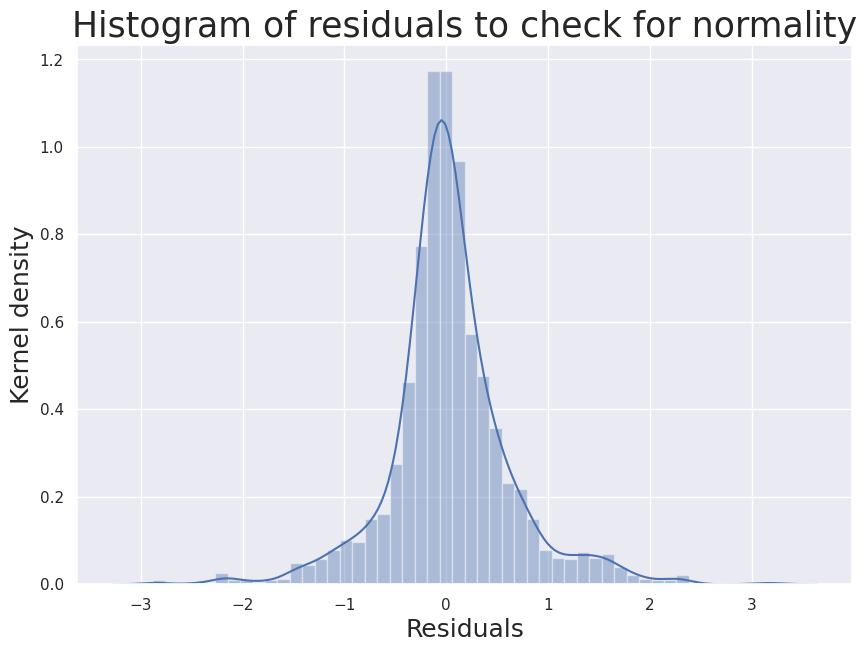

In [ ]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.distplot([y_test-predictions])

In [ ]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),6))

Mean absolute error (MAE): 0.4042406222519206
Mean square error (MSE): 0.3598714811462032
Root mean square error (RMSE): 0.5998928913949583
R-squared value of predictions: 0.807596


###Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1e-8)

In [ ]:
lasso_model.get_params()

{'alpha': 1e-08,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 1872 entries, 5240 to 3980
Series name: CO(GT)
Non-Null Count  Dtype  
--------------  -----  
1872 non-null   float64
dtypes: float64(1)
memory usage: 29.2 KB


In [ ]:
#print(y_train)
#print(y_train['CO(GT)'])
lasso_model.fit(X_train,y_train)

y_pred = lasso_model.predict(X_test)
#print("y_pred", y_pred)
y_predictions = []
errors = []
#print("y_test", y_test)

for y_prediction, y_actual in zip(y_pred, y_test):

  error = np.absolute(y_actual - y_prediction)
  errors.append(error)


  y_predictions.append(y_prediction)
  
  #print("Predicted: {pred:.4f}\tActual: {act:.4f}  \tError: {err:.4f}".format(pred=y_prediction, act=y_actual, err=error))

print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,y_predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,y_predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,y_predictions),6))
#print("Coefficients: ", lasso_model.coef_)


Mean absolute error (MAE): 0.40424062286124385
Mean square error (MSE): 0.3598714824535815
Root mean square error (RMSE): 0.5998928924846347
R-squared value of predictions: 0.807596


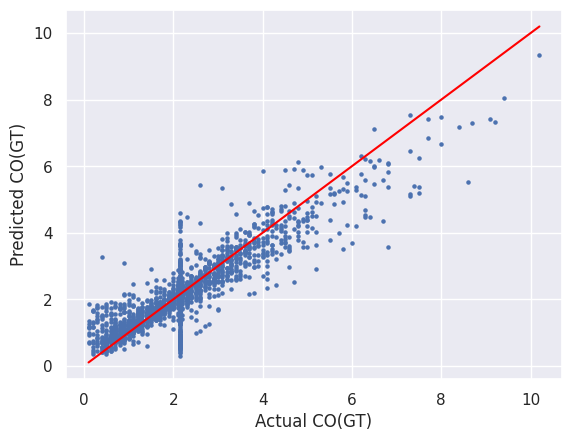

In [ ]:
plt.figure()
plt.scatter(y_test, y_predictions, s=5)
p1=max(max(y_test), max(y_predictions))
p2=min(min(y_test), min(y_predictions))
plt.plot([p1, p2], [p1, p2], c='red')
plt.xlabel('Actual CO(GT)')
plt.ylabel('Predicted CO(GT)')
plt.show()

# Bayesian Ridge Regression


Reference: https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
ridge_model = BayesianRidge()

In [ ]:
#print(y_train)
#print(y_train['CO(GT)'])
ridge_model.fit(X_train,y_train)

y_pred = ridge_model.predict(X_test)
print("y_pred", y_pred)
y_predictions = []
errors = []
print("y_test", y_test)

for y_prediction, y_actual in zip(y_pred, y_test):
  error = np.absolute(y_actual - y_prediction)
  y_predictions.append(y_prediction)
  errors.append(error)
  #print("Predicted: {pred:.4f}\tActual: {act:.4f}  \tError: {err:.4f}".format(pred=y_prediction, act=y_actual, err=error))

print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,y_predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,y_predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,y_predictions),3))
print("Coefficients: ", ridge_model.coef_)

y_pred [1.58121461 2.40173464 1.99655016 ... 1.46856669 1.27696203 0.80664345]
y_test 5240    2.15275
7651    2.15275
8959    1.90000
2095    0.60000
3357    2.15275
         ...   
14      2.00000
889     6.40000
7039    2.15275
1300    1.10000
3980    0.90000
Name: CO(GT), Length: 1872, dtype: float64
Mean absolute error (MAE): 0.40462864828326905
Mean square error (MSE): 0.3606764499716327
Root mean square error (RMSE): 0.6005634437523089
R-squared value of predictions: 0.807
Coefficients:  [ 1.12042229e-03  6.12277710e-02 -9.13154522e-05  2.94437168e-03
  6.24407122e-04  4.11766558e-03  7.47622341e-04 -2.94946197e-04]


Bayesian Ridge Hyperparameter Tuning

In [ ]:
best_ridge_model = BayesianRidge()
param_dist = {'alpha_1': [0, 1e-3, 1e-6, 1e-9], 'alpha_2': [0, 1e-3, 1e-6, 1e-9]}
random_search = RandomizedSearchCV(best_ridge_model, param_distributions=param_dist, n_iter=8, cv=5, random_state=42, scoring='r2')
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=BayesianRidge(), n_iter=8,
                   param_distributions={'alpha_1': [0, 0.001, 1e-06, 1e-09],
                                        'alpha_2': [0, 0.001, 1e-06, 1e-09]},
                   random_state=42, scoring='r2')

In [ ]:
best_ridge_reg = random_search.best_estimator_
y_pred = best_ridge_reg.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f'Best Hyperparameters: {random_search.best_params_}')
print(f'R-squared score: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

Best Hyperparameters: {'alpha_2': 1e-09, 'alpha_1': 1e-06}
R-squared score: 0.8072
Mean Squared Error: 0.3607
Root Mean Squared Error: 0.6006


In [ ]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,y_predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,y_predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,y_predictions)))
print("R-squared value of predictions:",round(metrics.r2_score(y_test,y_predictions),3))

Mean absolute error (MAE): 0.40462864828326905
Mean square error (MSE): 0.3606764499716327
Root mean square error (RMSE): 0.6005634437523089
R-squared value of predictions: 0.807


# Polynomial Regression 
# Applied Hyperparameter tuning

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Perform polynomial Regression
degree = 3
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)
lin_reg.predict(X_test_poly)
print(lin_reg.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [ ]:
y_pred1 = lin_reg.predict(X_test_poly)
mse1 = mean_squared_error(y_test, y_pred1)
rmse_no_tuning = np.sqrt(mse1)
print(f'RMSE without hyperparameter tuning: {rmse_no_tuning:.4f}')
print("R-squared value of predictions:",round(metrics.r2_score(y_test,y_predictions),5))

RMSE without hyperparameter tuning: 0.5631
R-squared value of predictions: 0.80717


In [ ]:
# Define the Hyperparameters to Tune
param_dist = {'fit_intercept': [True, False],'copy_X':[True, False], 'n_jobs': [1,-1]}

#Perform Randomized Search Cross Validation to Find the Best Model
random_search = RandomizedSearchCV(lin_reg, param_distributions=param_dist, n_iter=8, cv=5, random_state=42, scoring='r2')
random_search.fit(X_train_poly, y_train)


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=8,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, -1]},
                   random_state=42, scoring='r2')

In [ ]:
best_lin_reg = random_search.best_estimator_
y_pred = best_lin_reg.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f'Best Hyperparameters : {random_search.best_params_}')
print(f'R-squared score: {r2:.4f}')
print("R-squared value of predictions:",round(metrics.r2_score(y_test,y_pred),5))
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error with tuning: {rmse:.4f}')

Best Hyperparameters : {'n_jobs': 1, 'fit_intercept': True, 'copy_X': True}
R-squared score: 0.8305
R-squared value of predictions: 0.83045
Mean Squared Error: 0.3171
Root Mean Squared Error with tuning: 0.5631


#OLS REGRESSIOn


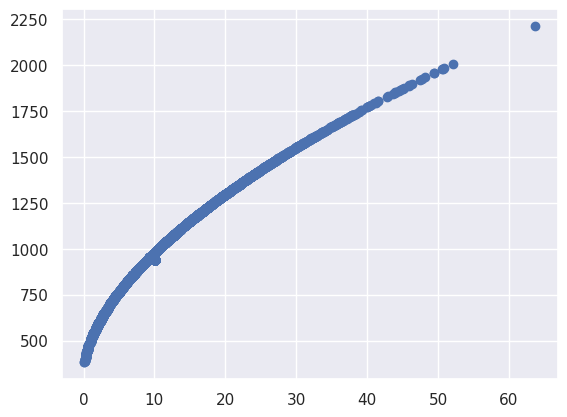

In [ ]:
plt.scatter(dataset['C6H6(GT)'], dataset['PT08.S2(NMHC)'])
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
X = dataset[['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']]
y = dataset['CO(GT)']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

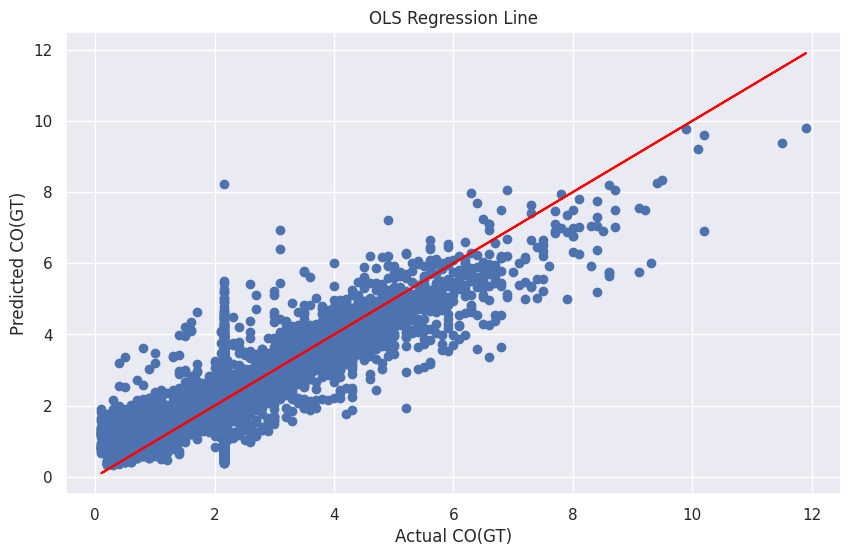

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(y, model.predict(X))
ax.plot(y, y, color='red')
ax.set_xlabel('Actual CO(GT)')
ax.set_ylabel('Predicted CO(GT)')
ax.set_title('OLS Regression Line')
plt.show()

# Hist Gradient Regressor Booster

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.1,
    "loss": "squared_error",
}
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
rse = metrics.r2_score(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("R-squared value of predictions: {:.4f}".format(rse))

The mean squared error (MSE) on test set: 0.2968
R-squared value of predictions: 0.8413


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
#Test data evaluation
pred_randomforest = rf.predict(X_test) #predicted CO concentrations
print('Random Forest Regression Model: R²={:.2f}'.format(metrics.r2_score(y_test, pred_randomforest)))

Random Forest Regression Model: R²=0.85


RF Hyperparameter Tuning Reference: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74


In [ ]:
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: ignored

In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
predictions = base_model.predict(X_test)
print("Base Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('Base: R²={:.2f}'.format(metrics.r2_score(y_test, predictions)))
best_random = rf_random.best_estimator_
best_predictions = best_random.predict(X_test)
print("Best Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,best_predictions)))
print('Best: R²={:.2f}'.format(metrics.r2_score(y_test, best_predictions)))